In [ ]:
import numpy as np
import pickle
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Activation, Dropout, UpSampling2D
from keras.layers import Conv2DTranspose, Conv2D, MaxPooling2D
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import BatchNormalization
import cv2
from skimage.transform import resize
import keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/archive (1).zip' -d '/content/cancerdata/'

Streaming output truncated to the last 5000 lines.
  inflating: /content/cancerdata/data/train/benign/420.jpg  
  inflating: /content/cancerdata/data/train/benign/421.jpg  
  inflating: /content/cancerdata/data/train/benign/422.jpg  
  inflating: /content/cancerdata/data/train/benign/423.jpg  
  inflating: /content/cancerdata/data/train/benign/424.jpg  
  inflating: /content/cancerdata/data/train/benign/425.jpg  
  inflating: /content/cancerdata/data/train/benign/426.jpg  
  inflating: /content/cancerdata/data/train/benign/429.jpg  
  inflating: /content/cancerdata/data/train/benign/43.jpg  
  inflating: /content/cancerdata/data/train/benign/430.jpg  
  inflating: /content/cancerdata/data/train/benign/431.jpg  
  inflating: /content/cancerdata/data/train/benign/432.jpg  
  inflating: /content/cancerdata/data/train/benign/434.jpg  
  inflating: /content/cancerdata/data/train/benign/435.jpg  
  inflating: /content/cancerdata/data/train/benign/438.jpg  
  inflating: /content/cancerdata/da

In [ ]:
import os
print(len(os.listdir('/content/cancerdata/train/benign')))
print(len(os.listdir('/content/cancerdata/train/malignant')))

1440
2001


In [ ]:
os.makedirs('/content/augment/')
import albumentations as A

FileExistsError: ignored

In [ ]:
import albumentations as A
transform = A.Compose([A.HorizontalFlip(p=0.5),])
transform2=A.Compose([A.Rotate(p=0.2),])
transform3=A.Compose([A.GaussNoise(var_limit=(10, 50),p=0.05),])

In [ ]:
from PIL import Image

In [ ]:
import cv2
c=0
f=0
for i in os.listdir('/content/cancerdata/train/malignant'):
  if c<268:
    image = cv2.imread("/content/cancerdata/train/malignant/"+str(i))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transformed = transform(image=image)
    transformed_image = transformed["image"]
    f=f+1
    transformed_image= Image.fromarray(transformed_image)
    transformed_image.save('/content/augment/'+str(f) + "aug" + ".jpg")

    transformed2 = transform2(image=image)
    transformed_image = transformed2["image"]
    f=f+1
    transformed_image= Image.fromarray(transformed_image)
    transformed_image.save('/content/augment/'+str(f) + "aug" + ".jpg")

    transformed3 = transform3(image=image)
    transformed_image = transformed3["image"]
    f=f+1
    transformed_image= Image.fromarray(transformed_image)
    transformed_image.save('/content/augment/'+str(f) + "aug" + ".jpg")
  c=c+1

In [ ]:
import shutil
import os

source_dir = '/content/augment'
target_dir = '/content/cancerdata/train/malignant/'

file_names = os.listdir(source_dir)

for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

Error: ignored

In [ ]:
print(len(os.listdir('/content/cancerdata/train/benign')))
print(len(os.listdir('/content/cancerdata/train/malignant')))

1440
2001


In [ ]:
import cv2
c=0
f=0
for i in os.listdir('/content/cancerdata/train/benign'):
  if c<187:
    image = cv2.imread("/content/cancerdata/train/benign/"+str(i))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    transformed = transform(image=image)
    transformed_image = transformed["image"]
    f=f+1
    transformed_image= Image.fromarray(transformed_image)
    transformed_image.save('/content/augment/'+str(f) + "aug" + ".jpg")

    transformed2 = transform2(image=image)
    transformed_image = transformed2["image"]
    f=f+1
    transformed_image= Image.fromarray(transformed_image)
    transformed_image.save('/content/augment/'+str(f) + "aug" + ".jpg")

    transformed3 = transform3(image=image)
    transformed_image = transformed3["image"]
    f=f+1
    transformed_image= Image.fromarray(transformed_image)
    transformed_image.save('/content/augment/'+str(f) + "aug" + ".jpg")
  c=c+1

In [ ]:
import shutil
import os

source_dir = '/content/augment'
target_dir = '/content/cancerdata/train/benign/'

file_names = os.listdir(source_dir)

for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

In [ ]:
print(len(os.listdir('/content/cancerdata/train/malignant')))
print(len(os.listdir('/content/cancerdata/train/benign')))

2001
2001


In [ ]:
import matplotlib.pyplot as plt
def plot(imgs, with_orig=True, row_title=None, **imshow_kwargs):
    if not isinstance(imgs[0], list):
        # Make a 2d grid even if there's just 1 row
        imgs = [imgs]

    num_rows = len(imgs)
    num_cols = len(imgs[0]) + with_orig
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
    for row_idx, row in enumerate(imgs):
        row = [orig_img] + row if with_orig else row
        for col_idx, img in enumerate(row):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

    if with_orig:
        axs[0, 0].set(title='Original image')
        axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])

    plt.tight_layout()

In [ ]:
!rm -rf '/content/hair_removed_images'

In [ ]:
#hair removal from images

import os

def hair_remove(image):
    # converts image to grayScale
    grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(10,10))
    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    # apply thresholding to blackhat
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    # inpaint with original image and threshold image
    final_image = cv2.inpaint(image,threshold,5,cv2.INPAINT_TELEA)

    return final_image

os.makedirs('/content/hair_removed_images/benign')
os.makedirs('/content/hair_removed_images/malignant')


In [ ]:
#benign
for i in os.listdir('/content/cancerdata/train/benign'):
    image = cv2.imread('/content/cancerdata/train/benign/'+i)
    image_resize = cv2.resize(image,(224,224))
    final_image = hair_remove(image_resize)
    final_image=tf.image.per_image_standardization(final_image)
    cv2.imwrite('/content/hair_removed_images/benign/'+i,np.asarray(final_image))

In [ ]:
#malignant
for i in os.listdir('/content/cancerdata/train/malignant'):
    image = cv2.imread('/content/cancerdata/train/malignant/'+i)
    image_resize = cv2.resize(image,(224,224))
    final_image = hair_remove(image_resize)
    final_image=tf.image.per_image_standardization(final_image)
    cv2.imwrite('/content/hair_removed_images/malignant/'+i,np.asarray(final_image))

In [ ]:
final_image=cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)

2001
1440


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
trainAug  = ImageDataGenerator(
featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,
        validation_split=0.2)

In [ ]:
batch_size = 32
img_height,img_width=224,224

train_ds = trainAug.flow_from_directory(
    directory=r"/content/drive/MyDrive/pre_two_train/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42,
    subset='training'
)

test_ds = trainAug.flow_from_directory(
    directory=r"/content/drive/MyDrive/pre_two_train/",
    target_size=(224, 224),
    color_mode="rgb",
    batch_size=32,
    class_mode="binary",
    shuffle=True,
    seed=42,
    subset='validation'
)

Found 2108 images belonging to 2 classes.
Found 526 images belonging to 2 classes.


Found 660 files belonging to 2 classes.
Using 132 files for validation.


In [ ]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [ ]:
import numpy as np
normalized_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

0.19215688 1.0


In [ ]:
def block(N,x,filters,kernel_size,activation,pool_size,strides):
  for i in range(0,N):
    x=tf.keras.layers.Conv2D(filters=filters,kernel_size=kernel_size,activation=activation,padding='same')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Dropout(0.2)(x)
    x=tf.keras.layers.Conv2D(filters=filters,kernel_size=kernel_size,activation=activation,padding='same')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.MaxPooling2D(pool_size=pool_size,strides=strides)(x)
  return x

In [ ]:
def block_two(N,x,filters,kernel_size,activation,pool_size,strides):
  for i in range(0,N):
    x=tf.keras.layers.Conv2D(filters=filters,kernel_size=kernel_size,activation=activation,padding='same')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Dropout(0.2)(x)
    x=tf.keras.layers.Conv2D(filters=filters,kernel_size=kernel_size,activation=activation,padding='same')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.Dropout(0.2)(x)
    x=tf.keras.layers.Conv2D(filters=filters,kernel_size=kernel_size,activation=activation,padding='same')(x)
    x=tf.keras.layers.BatchNormalization()(x)
    x=tf.keras.layers.MaxPooling2D(pool_size=pool_size,strides=strides)(x)
  return x

In [ ]:
def final_block(x):
  x=tf.keras.layers.GlobalMaxPooling2D()(x)
  x=tf.keras.layers.Dense(51, activation=keras.layers.LeakyReLU(alpha=0.04),kernel_regularizer='l2')(x)
  x=tf.keras.layers.Dense(1, activation='sigmoid')(x)
  return x

In [ ]:
def distorted():
  normalization_layer = tf.keras.layers.Rescaling(1./255)
  inputs=tf.keras.layers.Input(shape=(224,224,3,))
  inputs = normalization_layer(inputs)
  convs1=block(1,inputs,64,(3,3),'relu',pool_size=(2,2),strides=(2,2))
  convs2=block(1,convs1,128,(3,3),'relu',pool_size=(2,2),strides=(2,2))
  convs3=block_two(1,convs2,256,(3,3),'relu',pool_size=(2,2),strides=(2,2))
  outputs=final_block(convs3)
  model=tf.keras.Model(inputs=inputs,outputs=outputs)
  return model

In [ ]:
model = distorted()
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_14 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_14 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_8 (Dropout)         (None, 224, 224, 64)      0         
                                                                 
 conv2d_15 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_15 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                          

In [ ]:
import tensorflow as tf
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps = 10000,
    decay_rate=1e-6)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

In [ ]:
model = distorted()
#opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
#opt = tf.keras.optimizers.Adam(lr=0.001, decay=1e-6)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 conv2d_35 (Conv2D)          (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization_35 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                                
                                                                 
 dropout_20 (Dropout)        (None, 224, 224, 64)      0         
                                                                 
 conv2d_36 (Conv2D)          (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_36 (Bat  (None, 224, 224, 64)     256       
 chNormalization)                                          

In [ ]:
history = model.fit(train_ds,epochs=50,validation_data=test_ds,verbose=1)

In [ ]:
model.save('/content/drive/MyDrive/distorted_skin1.h5')

In [ ]:
import pickle
with open('model.pkl','wb') as files:
  pickle.dump(model,files)

INFO:tensorflow:Assets written to: ram://4b4757a4-c63e-429a-a583-1aa8e7e4a818/assets


INFO:tensorflow:Assets written to: ram://4b4757a4-c63e-429a-a583-1aa8e7e4a818/assets


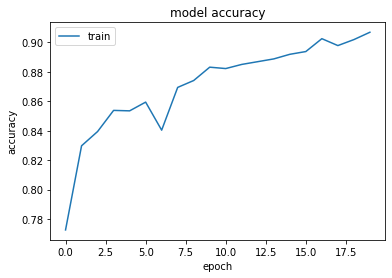

In [ ]:
plt.plot(history.history['accuracy'])
#plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:
from tensorflow.keras.models import load_model

Model=load_model('/content/drive/MyDrive/dist_skin.h5')

img=cv2.imread('/content/drive/MyDrive/malignant.jfif')
img=cv2.resize(img,(224,224))
img=np.asarray(img).reshape(-1,224,224,3)
Model.predict(img)

array([[0.7957234]], dtype=float32)

In [ ]:
image=cv2.imread('/content/drive/MyDrive/mali.jfif')
image=cv2.resize(image,(224,224))
image=np.asarray(image).reshape(-1,224,224,3)
model.predict(image)

array([[0.95435274]], dtype=float32)